In [1]:
%load prepareStats.py

C:\Users\micha\AppData\Local\Temp\ipykernel_22028\839611307.py:41: FutureWarning: Passing 'suffixes' which cause duplicate columns {'url_x'} in the result is deprecated and will raise a MergeError in a future version.
  results = results.merge(constructors, on="constructorId", how="right")


## First let's take a look at the circuits designed by Hermann Tilke

"Why do we imagine Hermann Tilke driving incredibly cautiously in a Nissan Micra?" [@BritsOnPole](https://twitter.com/britsonpole/status/5287814551)

In [2]:
tilkedromes = ["Kuala Lumpur", "Sakhir", "Istanbul", "Valencia", "Marina Bay", "Shanghai", "Abu Dhabi", "Yeongam County", "Uttar Pradesh", "Austin", "Sochi", "Baku", "Jeddah"]

In [3]:
results.loc[results.location.isin(tilkedromes),"tilkedrome"]=True

In [4]:
results.loc[(results.location == "Hockenheim") & (results.year > 2002),"tilkedrome"]=True
results.loc[(results.location == "Spielberg") & (results.year > 1996),"tilkedrome"]=True
results.loc[(results.location == "Oyama") & (results.year > 2005),"tilkedrome"]=True
results.loc[(results.location == "Montmeló") & (results.year > 2007),"tilkedrome"]=True
results.loc[(results.location == "Nürburg") & (results.year > 2002),"tilkedrome"]=True
results.loc[(results.location == "Mexico City") & (results.year > 2014),"tilkedrome"]=True

In [5]:
resultsBefore2022 = results[~results.year.eq(2022)]

In [6]:
tilkeRatio = resultsBefore2022[resultsBefore2022["tilkedrome"] == True].groupby("year")["raceId"].nunique() / resultsBefore2022.groupby("year")["raceId"].nunique()

<AxesSubplot:xlabel='year'>

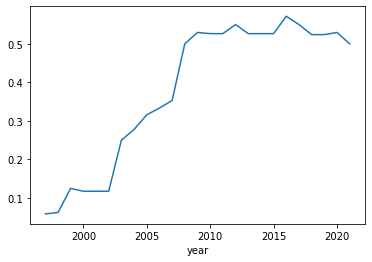

In [7]:
tilkeRatio.plot()

Tilkedromes skyrocketed between 2003 and 2009; they've been hosting around a half of races ever since.

## Street Circuits

In [8]:
yearlyStreetRatio = resultsBefore2022[resultsBefore2022["street"] == True].groupby("year")["raceId"].nunique() / resultsBefore2022.groupby("year")["raceId"].nunique()

<AxesSubplot:xlabel='year'>

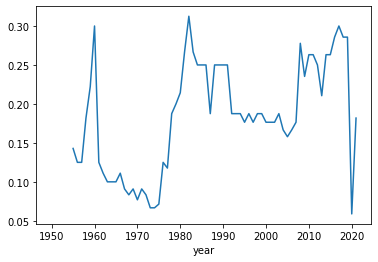

In [9]:
yearlyStreetRatio.plot()

The 1980s were the first era of street circuits (remarkably ugly in that time). The fad came back in the late 2000s with "destination races" (remarkably posh).

## Monaco Grand Prix

"Tell you the truth, I hate Monaco. It’s like riding a bicycle around your living room." Nelson Piquet

In [10]:
uniqueWinningLocations = pd.Series(wins.groupby("driverId")["location"].nunique(), dtype="object", name='uniq')

In [11]:
wins = wins.merge(uniqueWinningLocations, on="driverId", how="right")

In [12]:
wins[wins["uniq"] == 1].groupby(["location"])["fullname"].nunique().nlargest(5)

location
Indianapolis    10
Monte-Carlo      4
Monza            3
Budapest         2
Montreal         2
Name: fullname, dtype: int64

Four Monaco GP winners haven't won at any other venue. That's a record -- we'll see why Indy 500 results shouldn't count.

In [18]:
wins["year"] = wins["year"].apply(pd.to_numeric, errors = "coerce").astype(int, errors="ignore")

In [19]:
wins[(wins["uniq"] == 1) & (wins["location"] == "Monte-Carlo")][["fullname", "year"]].sort_values(by="year")

,fullname,year
925,Maurice Trintignant,1955
926,Maurice Trintignant,1958
821,Jean-Pierre Beltoise,1972
412,Olivier Panis,1996
205,Jarno Trulli,2004


In [13]:
indyWinnersOnly = wins[(wins["uniq"] == 1) & (wins["location"] == "Indianapolis")][["fullname"]]

In [14]:
indyWinnersOnly

,fullname
927,Rodger Ward
954,Jim Rathmann
955,Jimmy Bryan
956,Troy Ruttman
957,Pat Flaherty
989,Johnnie Parsons
990,Sam Hanks
991,Bob Sweikert
1011,Bill Vukovich
1012,Bill Vukovich


In [15]:
indyWinnersOnly = ["Rodger Ward", "Jim Rathmann", "Jimmy Bryan", "Troy Ruttman", "Pat Flaherty", "Johnnie Parsons", "Sam Hanks", "Bob Sweikert", "Bill Vukovich", "Lee Wallard"]

In [16]:
indyWinnersLocations = results[results.fullname.isin(indyWinnersOnly)].groupby("fullname")["location"].nunique()

In [17]:
indyWinnersLocations.nlargest(5)

fullname
Rodger Ward      3
Troy Ruttman     3
Bill Vukovich    1
Bob Sweikert     1
Jim Rathmann     1
Name: location, dtype: int64

Only two drivers that have won Indy 500 as a F1 World Championship race have participated in any other Grand Prix. Indy 500 was a kind of a spin-off, not really an integral part of the World Championship. 

In [20]:
pd.options.display.float_format = '{:.2%}'.format

In [21]:
qualifying = pd.read_csv(os.path.join("data", "qualifying.csv"))
qualifying = qualifying[["raceId", "driverId", "position"]]
qualifying.rename(columns = {'position':'qual'}, inplace = True)

In [22]:
results = results.merge(qualifying, on=["raceId", "driverId"], how="right")

In [23]:
poles = results[(results.qual == 1)]

In [24]:
winsFromPolesSince2007 = results[(results.qual == 1) & (results.position == 1) & (results.year > 2006)]

In [34]:
winsFromPolesSince2007.groupby("location")["raceId"].count().nlargest(10)

location
Montmeló       10
Monza          10
Spa             9
Abu Dhabi       8
Marina Bay      8
Monte-Carlo     8
São Paulo       8
Montreal        7
Shanghai        7
Melbourne       6
Name: raceId, dtype: int64

It's said that the Monaco GP gets decided on Saturday, in a qualification. But in the Lewis Hamilton era there are several track with more wins from pole than Monaco.

In [26]:
frequentLocations = ["Budapest", "Montmeló", "Monza", "Sakhir", "Silverstone", "Spa", "Melbourne", "Monte-Carlo", "São Paulo", "Abu Dhabi", " Shanghai", " Marina Bay", "Montreal", " Kuala Lumpur", "Suzuka", "Austin", "Sochi", "Spielberg"]

In [32]:
wfps2007r = winsFromPolesSince2007[(winsFromPolesSince2007.location.isin(frequentLocations))].groupby("location")["raceId"].count() / results[(results.year > 2006) & (results.location.isin(frequentLocations))].groupby("location")["raceId"].nunique()

In [33]:
wfps2007r.nlargest(10)

location
Montmeló      66.67%
Monza         66.67%
Abu Dhabi     61.54%
Spa           60.00%
Spielberg     60.00%
Montreal      58.33%
Monte-Carlo   57.14%
São Paulo     57.14%
Austin        55.56%
Suzuka        54.55%
Name: raceId, dtype: float64

It's tricky to compare absolute numbers, so there are relative chances of winning from pole on various tracks, counting only tracks with 8 or more races since 2007. Even if we keep in mind that in 2012 and 2021 the best qualifier didn't start from pole due to a penalty and a car malfunction respectively, Monaco is still not an outlier.